In [1]:
# 타이타닉 생존자 예측


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
tatanicDF= pd.read_csv('../data/tatanic.csv')
print(tatanicDF.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [13]:
# null값 처리

tatanicDF['Age'].fillna(tatanicDF['Age'].mean(), inplace=True) #평균으로 대체
tatanicDF['Cabin'].fillna('N', inplace=True)
tatanicDF['Embarked'].fillna('N', inplace=True)
print('null개수:', tatanicDF.isnull().sum().sum())

null개수: 0


In [17]:
print('sex값:', '\n', tatanicDF['Sex'].value_counts())
print('Cabin값:', '\n', tatanicDF['Cabin'].value_counts())
print('Embarked값:', '\n', tatanicDF['Embarked'].value_counts())


sex값: 
 Sex
male      577
female    314
Name: count, dtype: int64
Cabin값: 
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked값: 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [18]:
tatanicDF['Cabin']=tatanicDF['Cabin'].str[:1]
tatanicDF['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [19]:
tatanicDF.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

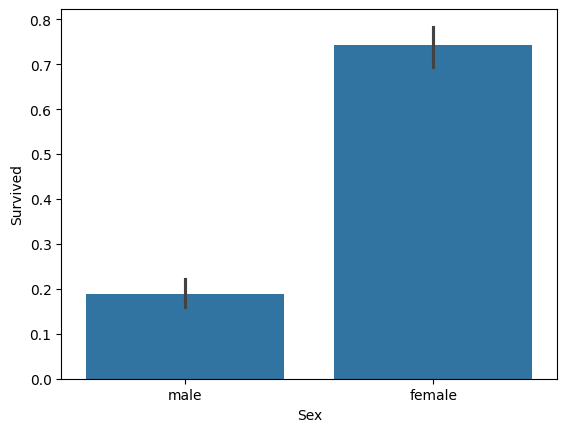

In [20]:
sns.barplot(x='Sex', y='Survived', data=tatanicDF)

<Axes: xlabel='Pclass', ylabel='Survived'>

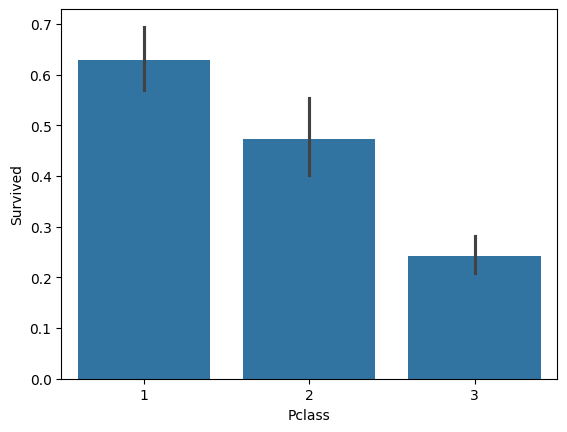

In [21]:
sns.barplot(x='Pclass', y='Survived', data=tatanicDF)

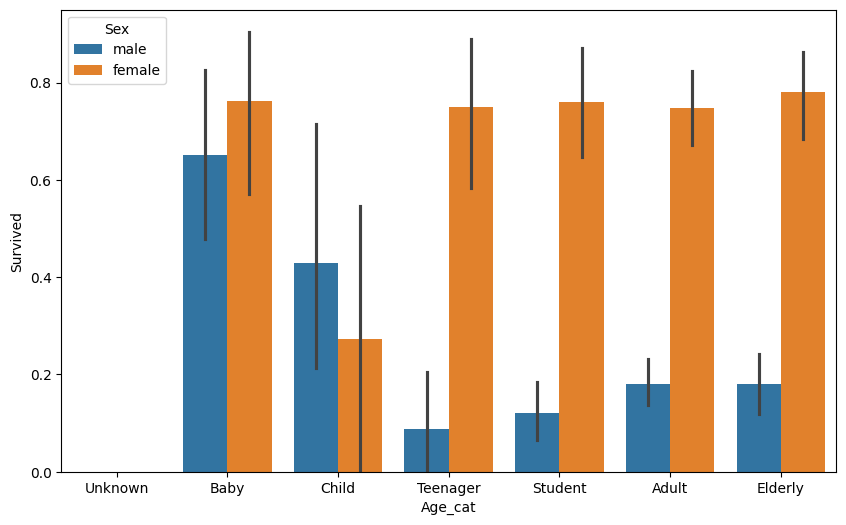

In [24]:
# 나이 분류
def get_category(age):
    cat=''
    if age <= -1: cat='Unknown'
    elif age <=5: cat='Baby'
    elif age <=12: cat='Child'
    elif age <=18: cat='Teenager'
    elif age <=25: cat='Student'
    elif age <=35: cat='Adult'
    else: cat='Elderly'
    return cat

plt.figure(figsize=(10,6))
group_names=['Unknown',
'Baby',
'Child',
'Teenager',
'Student',
'Adult',
'Elderly']
tatanicDF['Age_cat']= tatanicDF['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=tatanicDF, order=group_names)
tatanicDF.drop('Age_cat', axis=1, inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features= ['Carbin', 'Sex', 'Embarked']
    for feature in features:
        le= LabelEncoder()
        le= le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    
    return dataDF

tatanicDF= encode_features(tatanicDF)
tatanicDF.head()

KeyError: 'Carbin'

In [40]:
#null 처리함수

def fillna(tatanicDF):
    tatanicDF['Age'].fillna(tatanicDF['Age'].mean(), inplace=True) #평균으로 대체
    tatanicDF['Cabin'].fillna('N', inplace=True)
    tatanicDF['Embarked'].fillna('N', inplace=True)
    tatanicDF['Fare'].fillna(0, inplace=True)
    return tatanicDF

def drop_features(tatanicDF):
    tatanicDF.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return tatanicDF

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features= ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le= LabelEncoder()
        le=le.fit(df[feature])
        df[feature]= le.transform(df[feature])
    return df

def transform_features(df):
    df= fillna(df)
    df= drop_features(df)
    df=format_features(df)
    return df



In [41]:
titanic_df= pd.read_csv('../data/tatanic.csv')
y_titanic_df= titanic_df['Survived']
x_titanic_df= titanic_df.drop('Survived', axis=1)

x_titanic_df=transform_features(x_titanic_df)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(x_titanic_df, y_titanic_df, test_size=.2, random_state=11)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 인스턴스 생성
dt_clf= DecisionTreeClassifier(random_state=11)
rf_clf= RandomForestClassifier(random_state=11)
lr_clf= LogisticRegression(solver='liblinear')

# 학습
dt_clf.fit(X_train, Y_train)
dt_pred= dt_clf.predict(X_test)
print(f'DT 정확도: {accuracy_score(Y_test, dt_pred)}')

rf_clf.fit(X_train, Y_train)
rf_pred= rf_clf.predict(X_test)
print(f'RF 정확도: {accuracy_score(Y_test, rf_pred)}')

lr_clf.fit(X_train, Y_train)
lr_pred= lr_clf.predict(X_test)
print(f'LR 정확도: {accuracy_score(Y_test, lr_pred)}')


DT 정확도: 0.7877094972067039
RF 정확도: 0.8547486033519553
LR 정확도: 0.8659217877094972


In [47]:
# 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold= KFold(n_splits=folds)
    scores=[]

    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        X_train, X_test= x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        Y_train, Y_test= y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, Y_train)
        predictions= clf.predict(X_test)
        accuracy= accuracy_score(Y_test, predictions)
        scores.append(accuracy)
        print(f'{iter_count} 정확도: {accuracy}')

    mean_score= np.mean(scores)
    print(f'평균정확도: {mean_score}')
exec_kfold(dt_clf, folds=5)

0 정확도: 0.7541899441340782
1 정확도: 0.7808988764044944
2 정확도: 0.7865168539325843
3 정확도: 0.7696629213483146
4 정확도: 0.8202247191011236
평균정확도: 0.782298662984119


In [49]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f'{iter_count} 정확도: {accuracy}')

0 정확도: 0.7430167597765364
1 정확도: 0.7752808988764045
2 정확도: 0.7921348314606742
3 정확도: 0.7865168539325843
4 정확도: 0.8426966292134831
